In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

def scrape_detik(category, num_pages=40):
    all_data = []
    for page in range(1, num_pages + 1):

        url = f'https://www.detik.com/search/searchnews?query={category}&sortby=time&page={page}'
        req = requests.get(url)
        sop = BeautifulSoup(req.text, 'html.parser')
        articles_container = sop.find('div', class_='list media_rows list-berita')
        articles = articles_container.find_all('article')

        for article in articles:
            link = article.find('a')['href']
            date = article.find('a').find('span', class_='date').text.replace('WIB', '').replace('detikNews', '').split(',')[1]
            headline = article.find('a').find('h2').text
            ge_ = requests.get(link).text
            sop_ = BeautifulSoup(ge_, 'html.parser')
            content = sop_.find('div', class_='detail__body-text itp_bodycontent')

            # Pengecekan apakah content memiliki nilai None
            if content:
                paragraphs = content.find_all('p')
                content_ = ''.join([p.get_text(strip=True) for p in paragraphs])
            else:
                content_ = ''
            all_data.append({
                'category': category,
                'headline': headline,
                'date': date,
                'content': content_
            })

    return all_data

# Daftar kategori
categories = ['pemilu+2024', 'sport', 'edu']

# Lakukan crawling data untuk setiap kategori
all_data = []

for category in categories:
    category_data = scrape_detik(category)
    all_data.extend(category_data)

# Simpan data ke CSV
csv_file_path = 'data_detik_news_.csv'
csv_columns = ['category', 'headline', 'date', 'content']

with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=csv_columns)
    writer.writeheader()
    for data in all_data:
        writer.writerow(data)

print(f'Data telah disimpan ke {csv_file_path}')


KeyboardInterrupt: ignored

# PREPROCESSING

In [1]:
import nltk
import pandas as pd

# Menghapus Data Yang Terindeks Duplikat

In [3]:
df = pd.read_csv('categories.csv')
import pandas as pd
df.drop_duplicates(inplace=True)
#print data
df.to_csv('Dataset_categories_tanpa_duplikat.csv', index=False)
df

,category,headline,date,content
0,pemilu+2024,"Survei LSI: 60,2% Responden Nilai Jokowi Netra...",10 Des 2023 15:23,Lembaga Survei Indonesia (LSI) merilis survei ...
1,pemilu+2024,Berapa Gaji Petugas KPPS Pemilu 2024? Ini Nomi...,10 Des 2023 15:20,Salah satu petugas yang berperan besar dalam p...
2,pemilu+2024,"Survei LSI : Prabowo-Gibran Unggul, Ganjar-Mah...",10 Des 2023 15:15,NaN
3,pemilu+2024,"Elektabilitas Parpol Versi LSI : PDIP Wahid, D...",10 Des 2023 15:13,NaN
4,pemilu+2024,Dua Mantan Gubernur Jatim Hadiri Konsolidasi A...,10 Des 2023 15:11,Tim Kampanye Daerah (TKD) Jatim Prabowo Subian...
...,...,...,...,...
1074,edu,Tips Gali Potensi dan Minat Anak untuk Raih Ci...,10 Mei 2021 09:00,Setiap anak tentu punya potensi dan mintanya t...
1075,edu,Fauna Indonesia Bagian Timur: Karakteristik da...,29 Apr 2021 06:00,Indonesia memiliki kekayaan flora dan fauna ya...
1076,edu,"Hari Kartini, Gubernur Ganjar dan Mendikbud Ak...",20 Apr 2021 21:13,Wahid Foundation bersama dengan Mitra Sekolah ...
1077,edu,"Lebih Sehat, Ini 4 Superfood yang Cocok untuk ...",20 Apr 2021 00:00,Tubuh perlu asupan gizi yang cukup agar cepat ...


# Menghapus kolom yang tidak terpakai

In [4]:
# Menghapus kolom yang tidak terpakai
df = df.drop(['date', 'headline'], axis=1)

# Menyimpan dataset yang telah diproses
df
# .to_csv('nama_file_dataset_baru.csv', index=False)


,category,content
0,pemilu+2024,Lembaga Survei Indonesia (LSI) merilis survei ...
1,pemilu+2024,Salah satu petugas yang berperan besar dalam p...
2,pemilu+2024,NaN
3,pemilu+2024,NaN
4,pemilu+2024,Tim Kampanye Daerah (TKD) Jatim Prabowo Subian...
...,...,...
1074,edu,Setiap anak tentu punya potensi dan mintanya t...
1075,edu,Indonesia memiliki kekayaan flora dan fauna ya...
1076,edu,Wahid Foundation bersama dengan Mitra Sekolah ...
1077,edu,Tubuh perlu asupan gizi yang cukup agar cepat ...


# Cleaning data

In [5]:
import re, string
import numpy as np

# Text Cleaning
def cleaning(text):
    # HTML Tag Removal

    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Case folding
    text = text.lower()

    # Trim text
    text = text.strip()

    # Remove punctuations, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)

    # Number removal
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

In [7]:
pip install indoNLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 1.7 MB/s eta 0:00:00


In [8]:
from indoNLP.preprocessing import pipeline, replace_word_elongation, replace_slang, emoji_to_words, remove_html
import pandas as pd

pipe = pipeline([replace_word_elongation, replace_slang, emoji_to_words, remove_html])

from nltk.stem import PorterStemmer
ps = PorterStemmer()

# Lakukan preprocessing hanya pada kolom 'content'
df['content(clean)'] = df['content'].astype(str).apply(lambda x: pipe(x))
df['content(clean)'] = df['content(clean)'].apply(lambda x: cleaning(x))

# Ubah empty string menjadi NaN di kolom hasil cleaning
df['content(clean)'] = df['content(clean)'].replace('', np.nan)

# Hapus baris dengan nilai NaN pada kolom 'content(clean)'
df.dropna(subset=['content(clean)'], inplace=True)

# Tampilkan DataFrame dengan kolom 'content' dan 'category'
df= df[['content','content(clean)','category']]
df

,content,content(clean),category
0,Lembaga Survei Indonesia (LSI) merilis survei ...,lembaga survei indonesia lsi merilis survei so...,pemilu+2024
1,Salah satu petugas yang berperan besar dalam p...,salah satu petugas yang berperan besar dalam p...,pemilu+2024
4,Tim Kampanye Daerah (TKD) Jatim Prabowo Subian...,tim kampanye daerah tkd jatim prabowo subianto...,pemilu+2024
5,Indonesia akan menyelenggarakan Pemilu pada 14...,indonesia akan menyelenggarakan pemilu pada fe...,pemilu+2024
6,Tim Kampanye Nasional (TKN) Pemilih Muda (Fant...,tim kampanye nasional tkn pemilih muda fanta p...,pemilu+2024
...,...,...,...
1074,Setiap anak tentu punya potensi dan mintanya t...,setiap anak tentu punya potensi dan mintanya t...,edu
1075,Indonesia memiliki kekayaan flora dan fauna ya...,indonesia memiliki kekayaan flora dan fauna ya...,edu
1076,Wahid Foundation bersama dengan Mitra Sekolah ...,wahid foundation bersama dengan mitra sekolah ...,edu
1077,Tubuh perlu asupan gizi yang cukup agar cepat ...,tubuh perlu asupan gizi yang cukup agar cepat ...,edu


In [9]:
# Membuat mapping dari label string ke nilai integer
label_mapping = {'pemilu+2024': 0, 'sport': 1, 'edu': 2}
# Mengaplikasikan mapping ke kolom 'category' untuk mengonversi label string ke nilai integer
df['category'] = df['category'].map(label_mapping)
# Menampilkan DataFrame dengan kolom 'content', 'content(clean)', dan 'category' yang telah diubah ke nilai integer
df = df[['content', 'content(clean)', 'category']]
df

,content,content(clean),category
0,Lembaga Survei Indonesia (LSI) merilis survei ...,lembaga survei indonesia lsi merilis survei so...,0
1,Salah satu petugas yang berperan besar dalam p...,salah satu petugas yang berperan besar dalam p...,0
4,Tim Kampanye Daerah (TKD) Jatim Prabowo Subian...,tim kampanye daerah tkd jatim prabowo subianto...,0
5,Indonesia akan menyelenggarakan Pemilu pada 14...,indonesia akan menyelenggarakan pemilu pada fe...,0
6,Tim Kampanye Nasional (TKN) Pemilih Muda (Fant...,tim kampanye nasional tkn pemilih muda fanta p...,0
...,...,...,...
1074,Setiap anak tentu punya potensi dan mintanya t...,setiap anak tentu punya potensi dan mintanya t...,2
1075,Indonesia memiliki kekayaan flora dan fauna ya...,indonesia memiliki kekayaan flora dan fauna ya...,2
1076,Wahid Foundation bersama dengan Mitra Sekolah ...,wahid foundation bersama dengan mitra sekolah ...,2
1077,Tubuh perlu asupan gizi yang cukup agar cepat ...,tubuh perlu asupan gizi yang cukup agar cepat ...,2


In [10]:
# Menghitung jumlah data pada setiap label
count = df['category'].value_counts()
# Menampilkan hasil perhitungan jumlah data pada setiap label
# print(count)
count

1    344
0    337
2    329
Name: category, dtype: int64

<Axes: xlabel='category', ylabel='count'>

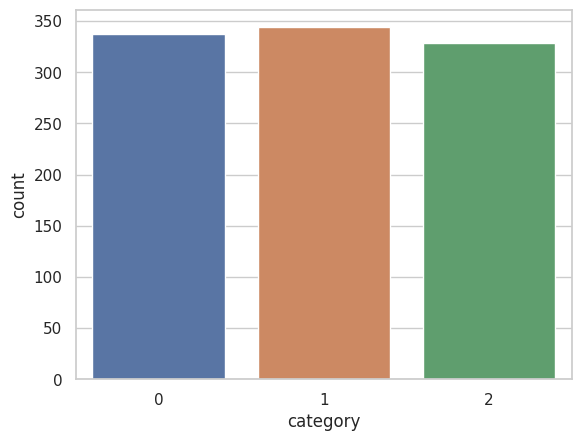

In [11]:
# graph untuk label
import seaborn as sns
sns.set(style="whitegrid")
sns.countplot(x='category', data=df)

# Tokenisasi

In [12]:
from nltk.tokenize import TweetTokenizer
# Inisialisasi tweet tokenizer
tknzr = TweetTokenizer()
# Menerapkan tweet tokenizer pada setiap teks tweet dan menambahkan kolom token pada dataframe
df['token'] = df['content(clean)'].apply(lambda x: tknzr.tokenize(x))
# Mendownload dataframe dalam format CSV
df.to_csv('Hasil Tokenzing.csv', index=False)
# print(df)
df

,content,content(clean),category,token
0,Lembaga Survei Indonesia (LSI) merilis survei ...,lembaga survei indonesia lsi merilis survei so...,0,"[lembaga, survei, indonesia, lsi, merilis, sur..."
1,Salah satu petugas yang berperan besar dalam p...,salah satu petugas yang berperan besar dalam p...,0,"[salah, satu, petugas, yang, berperan, besar, ..."
4,Tim Kampanye Daerah (TKD) Jatim Prabowo Subian...,tim kampanye daerah tkd jatim prabowo subianto...,0,"[tim, kampanye, daerah, tkd, jatim, prabowo, s..."
5,Indonesia akan menyelenggarakan Pemilu pada 14...,indonesia akan menyelenggarakan pemilu pada fe...,0,"[indonesia, akan, menyelenggarakan, pemilu, pa..."
6,Tim Kampanye Nasional (TKN) Pemilih Muda (Fant...,tim kampanye nasional tkn pemilih muda fanta p...,0,"[tim, kampanye, nasional, tkn, pemilih, muda, ..."
...,...,...,...,...
1074,Setiap anak tentu punya potensi dan mintanya t...,setiap anak tentu punya potensi dan mintanya t...,2,"[setiap, anak, tentu, punya, potensi, dan, min..."
1075,Indonesia memiliki kekayaan flora dan fauna ya...,indonesia memiliki kekayaan flora dan fauna ya...,2,"[indonesia, memiliki, kekayaan, flora, dan, fa..."
1076,Wahid Foundation bersama dengan Mitra Sekolah ...,wahid foundation bersama dengan mitra sekolah ...,2,"[wahid, foundation, bersama, dengan, mitra, se..."
1077,Tubuh perlu asupan gizi yang cukup agar cepat ...,tubuh perlu asupan gizi yang cukup agar cepat ...,2,"[tubuh, perlu, asupan, gizi, yang, cukup, agar..."


# Stopwords Removal

In [13]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian'), stopwords.words('english')))

df['token'] = df['token'].apply(lambda x: [w for w in x if not w in stop_words])
df[["content(clean)", "category","token"]]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,content(clean),category,token
0,lembaga survei indonesia lsi merilis survei so...,0,"[lembaga, survei, indonesia, lsi, merilis, sur..."
1,salah satu petugas yang berperan besar dalam p...,0,"[salah, petugas, berperan, pelaksanaan, pemilu..."
4,tim kampanye daerah tkd jatim prabowo subianto...,0,"[tim, kampanye, daerah, tkd, jatim, prabowo, s..."
5,indonesia akan menyelenggarakan pemilu pada fe...,0,"[indonesia, menyelenggarakan, pemilu, februari..."
6,tim kampanye nasional tkn pemilih muda fanta p...,0,"[tim, kampanye, nasional, tkn, pemilih, muda, ..."
...,...,...,...
1074,setiap anak tentu punya potensi dan mintanya t...,2,"[anak, potensi, mintanya, tersendiri, orang, t..."
1075,indonesia memiliki kekayaan flora dan fauna ya...,2,"[indonesia, memiliki, kekayaan, flora, fauna, ..."
1076,wahid foundation bersama dengan mitra sekolah ...,2,"[wahid, foundation, mitra, sekolah, damai, men..."
1077,tubuh perlu asupan gizi yang cukup agar cepat ...,2,"[tubuh, asupan, gizi, cepat, mengganti, tenaga..."


#Ekstraksi TF-IDF

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengambil kolom teks dari data tweet
text = df['token']

# Menggabungkan elemen-elemen dalam list text menjadi satu string
corpus = [' '.join(tokens) for tokens in text]

# Membuat objek TfidfVectorizer dan mengekstrak fitur
tfidf = TfidfVectorizer(min_df=2, max_df=0.8, ngram_range=(1, 2))
features = tfidf.fit_transform(corpus).toarray()

# Mendapatkan daftar nama fitur
feature_names = tfidf.get_feature_names_out()

# Membuat DataFrame dari hasil ekstraksi fitur
df_features = pd.DataFrame(features, columns=feature_names)

# Menampilkan DataFrame hasil ekstraksi fitur
print(df_features)

df_features.to_csv('Hasil Ekstrasi.csv', index=False)

      aaaah  aaaah auk  aaron  aaron ramsdale   ab  ab tbg  abad  abadi  abah  \
0       0.0        0.0    0.0             0.0  0.0     0.0   0.0    0.0   0.0   
1       0.0        0.0    0.0             0.0  0.0     0.0   0.0    0.0   0.0   
2       0.0        0.0    0.0             0.0  0.0     0.0   0.0    0.0   0.0   
3       0.0        0.0    0.0             0.0  0.0     0.0   0.0    0.0   0.0   
4       0.0        0.0    0.0             0.0  0.0     0.0   0.0    0.0   0.0   
...     ...        ...    ...             ...  ...     ...   ...    ...   ...   
1005    0.0        0.0    0.0             0.0  0.0     0.0   0.0    0.0   0.0   
1006    0.0        0.0    0.0             0.0  0.0     0.0   0.0    0.0   0.0   
1007    0.0        0.0    0.0             0.0  0.0     0.0   0.0    0.0   0.0   
1008    0.0        0.0    0.0             0.0  0.0     0.0   0.0    0.0   0.0   
1009    0.0        0.0    0.0             0.0  0.0     0.0   0.0    0.0   0.0   

      abc  ...  zulhas ment

In [15]:
df

,content,content(clean),category,token
0,Lembaga Survei Indonesia (LSI) merilis survei ...,lembaga survei indonesia lsi merilis survei so...,0,"[lembaga, survei, indonesia, lsi, merilis, sur..."
1,Salah satu petugas yang berperan besar dalam p...,salah satu petugas yang berperan besar dalam p...,0,"[salah, petugas, berperan, pelaksanaan, pemilu..."
4,Tim Kampanye Daerah (TKD) Jatim Prabowo Subian...,tim kampanye daerah tkd jatim prabowo subianto...,0,"[tim, kampanye, daerah, tkd, jatim, prabowo, s..."
5,Indonesia akan menyelenggarakan Pemilu pada 14...,indonesia akan menyelenggarakan pemilu pada fe...,0,"[indonesia, menyelenggarakan, pemilu, februari..."
6,Tim Kampanye Nasional (TKN) Pemilih Muda (Fant...,tim kampanye nasional tkn pemilih muda fanta p...,0,"[tim, kampanye, nasional, tkn, pemilih, muda, ..."
...,...,...,...,...
1074,Setiap anak tentu punya potensi dan mintanya t...,setiap anak tentu punya potensi dan mintanya t...,2,"[anak, potensi, mintanya, tersendiri, orang, t..."
1075,Indonesia memiliki kekayaan flora dan fauna ya...,indonesia memiliki kekayaan flora dan fauna ya...,2,"[indonesia, memiliki, kekayaan, flora, fauna, ..."
1076,Wahid Foundation bersama dengan Mitra Sekolah ...,wahid foundation bersama dengan mitra sekolah ...,2,"[wahid, foundation, mitra, sekolah, damai, men..."
1077,Tubuh perlu asupan gizi yang cukup agar cepat ...,tubuh perlu asupan gizi yang cukup agar cepat ...,2,"[tubuh, asupan, gizi, cepat, mengganti, tenaga..."


# svm

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.sparse import hstack
import joblib  # Import joblib for model saving

# Memisahkan teks dan label
texts = df['content(clean)'].values
labels = df['category'].values

# Pembagian dataset menjadi data latih dan data uji
texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.1, random_state=60)

# Ekstraksi fitur menggunakan TF-IDF
vectorizer = TfidfVectorizer()
features_train_tfidf = vectorizer.fit_transform(texts_train)
features_test_tfidf = vectorizer.transform(texts_test)

# Ekstraksi fitur menggunakan Information Gain
info_gain_selector = SelectKBest(mutual_info_classif, k=1000)  # Jumlah fitur yang diinginkan
info_gain_selector.fit(features_train_tfidf, labels_train)
features_train_info_gain = info_gain_selector.transform(features_train_tfidf)
features_test_info_gain = info_gain_selector.transform(features_test_tfidf)

# Menggabungkan fitur dari TF-IDF dan Information Gain
features_train = hstack([features_train_tfidf, features_train_info_gain])
features_test = hstack([features_test_tfidf, features_test_info_gain])

# Membangun model SVM
svm_model = SVC(kernel='linear')  # Anda bisa mengubah kernel sesuai kebutuhan (linear, rbf, dll.)
svm_model.fit(features_train, labels_train)

# Melakukan prediksi dengan model SVM
predictions = svm_model.predict(features_test)

# Menghitung nilai akurasi, presisi, dan recall
accuracy = accuracy_score(labels_test, predictions)
precision = precision_score(labels_test, predictions, average='weighted')
recall = recall_score(labels_test, predictions, average='weighted')

# Menampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Simpan model SVM yang telah dilatih
joblib.dump(svm_model, 'svm_model_with_info_gain.pkl')


Output streaming akan dipotong hingga 5000 baris terakhir.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass v

Accuracy: 0.9504950495049505
Precision: 0.9502220442632499
Recall: 0.9504950495049505


['svm_model_with_info_gain.pkl']